<a href="https://colab.research.google.com/github/Hongquanthaort/Git/blob/main/TKMT1_T%C3%ACm_hi%E1%BB%83u_h%E1%BB%87_s%E1%BB%91_t%C6%B0%C6%A1ng_quan_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sử dụng thư viện pandas để quản lý và phân tích dữ liệu

In [ ]:
import pandas as pd

Đọc tập dữ liệu state.csv

In [ ]:
df = pd.read_csv("/content/state.csv")

Hiển thị các thông số cơ bản của tập dữ liệu

In [ ]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [ ]:
df.shape

(50, 4)

Ghi chú: Nếu có cột dữ liệu ID/STT thì loại bỏ cột này vì không có ý nghĩa khi phân tích dữ liệu

**PHÂN TÍCH DỮ LIỆU ĐỊNH LƯỢNG**

Sao chép các cột dữ liệu định lượng sang 1 dataframe khác (Khi thành thạo có thể không cần thực hiện thao tác sao chép này)

In [ ]:
df_dl = pd.DataFrame(columns = ['Population', 'Murder.Rate'], data = df)
df_dl.head()

,Population,Murder.Rate
0,4779736,5.7
1,710231,5.6
2,6392017,4.7
3,2915918,5.6
4,37253956,4.4


In [ ]:
df_dl.shape

(50, 2)

Tính các thông số thống kê định lượng

In [ ]:
print('Giá trị trung bình Population: ', df_dl['Population'].mean(), "\nGiá trị trung bình Murder.Rate: ", df_dl['Murder.Rate'].mean())

Giá trị trung bình Population:  6162876.3 
Giá trị trung bình Murder.Rate:  4.066


In [ ]:
print('Giá trị lớn nhất Population: ', df_dl['Population'].max(), "\nGiá trị lớn nhất Murder.Rate: ", df_dl['Murder.Rate'].max())

Giá trị lớn nhất Population:  37253956 
Giá trị lớn nhất Murder.Rate:  10.3


In [ ]:
print('Giá trị nhỏ nhất Population: ', df_dl['Population'].min(), "\nGiá trị nhỏ nhất  Murder.Rate: ", df_dl['Murder.Rate'].min())

Giá trị nhỏ nhất Population:  563626 
Giá trị nhỏ nhất  Murder.Rate:  0.9


In [ ]:
print('Độ lệch chuẩn Population: ', df_dl['Population'].std(), "\nĐộ lệch chuẩn Murder.Rate: ", df_dl['Murder.Rate'].std())

Độ lệch chuẩn Population:  6848235.347401142 
Độ lệch chuẩn Murder.Rate:  1.915736124302923


In [ ]:
print('Phương sai Population: ', df_dl['Population'].var(), "\nPhương sai Murder.Rate: ", df_dl['Murder.Rate'].var())

Phương sai Population:  46898327373394.445 
Phương sai Murder.Rate:  3.670044897959184


In [ ]:
print('Q1 Population: ', df_dl['Population'].quantile(0.25), "\nQ1 Murder.Rate: ", df_dl['Murder.Rate'].quantile(0.25))


Q1 Population:  1833004.25 
Q1 Murder.Rate:  2.425


In [ ]:
print('Q2 Population:', df_dl['Population'].quantile(0.50), "\nQ1 Murder.Rate:", df_dl['Murder.Rate'].quantile(0.50))

Q2 Population: 4436369.5 
Q1 Murder.Rate: 4.0


In [ ]:
print('Q3 Population:', df_dl['Population'].quantile(0.75), "\nQ3 Murder.Rate:", df_dl['Murder.Rate'].quantile(0.75))


Q3 Population: 6680312.25 
Q3 Murder.Rate: 5.55


In [ ]:
print('IQR của Population: ',df_dl['Population'].quantile(0.75) - df_dl['Population'].quantile(0.25), "\nIQR của Murder.Rate: ", df_dl['Murder.Rate'].quantile(0.75) - df_dl['Murder.Rate'].quantile(0.25) )


IQR của Population:  4847308.0 
IQR của Murder.Rate:  3.125


Có thể thay các phép tính riêng biệt trên bằng cách sử dụng hàm **describe()**

In [ ]:
df_dl.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


Mô tả trực quan hóa dữ liệu định lượng

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

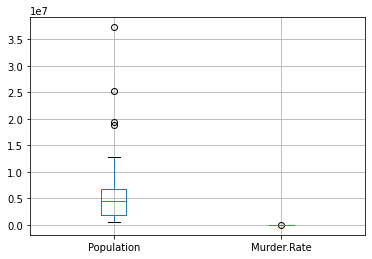

In [ ]:
boxplot = df_dl.boxplot(column=['Population', 'Murder.Rate'])

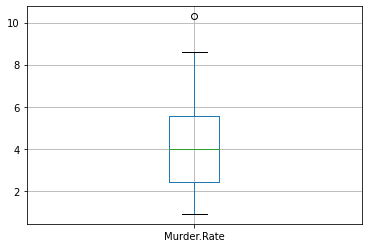

In [ ]:
df_dl.boxplot(column=['Murder.Rate'])

Xem xét mối quan hệ giữa 2 biến định lượng có thể sử dụng công cụ trực quan **scatterplot**

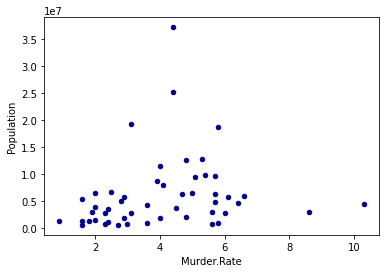

In [ ]:
sc = df_dl.plot.scatter(x ='Murder.Rate', y = 'Population', c = 'DarkBlue')

Mối quan hệ giữa 2 cột dữ liệu định lượng còn được biểu hiện qua hệ số tương quan (correlation). Trong pandas có thể tính hệ số này như sau:

In [ ]:
df_dl.corr(method='pearson')

,Population,Murder.Rate
Population,1.000000,0.182069
Murder.Rate,0.182069,1.000000


 BÀI TẬP: Bạn hãy tìm hiểu về hệ số tương quan (correlation), cách đọc và giải thích ý nghĩa hệ số tương quan.

**Tương quan** là một thước đo thống kê được tiêu chuẩn hóa thể hiện mức độ mà hai biến có liên quan tuyến tính với nhau (nghĩa là chúng thay đổi cùng nhau với tốc độ không đổi bao nhiêu). Độ mạnh và sự kết hợp định hướng của mối quan hệ giữa hai biến được xác định theo mối tương quan và nó nằm trong khoảng từ -1 đến +1. Tương tự như hiệp phương sai, giá trị dương biểu thị rằng cả hai biến chuyển động theo cùng một hướng trong khi giá trị âm cho chúng ta biết rằng chúng di chuyển theo các hướng ngược nhau.

# **Tính toán hệ số tương quan**

# **Hệ số tương quan là gì**

Hệ số tương quan hay Correlation Coefficient là chỉ số đo thống kê giữa 2 biến số với nhau. Qua đó có thể thấy được độ mạnh yếu của mối quan hệ. Giá trị của hệ số nằm trong khoảng -1,0 đến 1,0. Nếu giá trị thu được ngoài khoảng nghĩa là phép đo tương quan bị lỗi.

Mỗi loại Correlation Coefficient được định nghĩa riêng, đặc tính và phạm vi sử dụng không giống nhau. Trong trường hợp Correlation Coefficient mang giá trị âm (-) thì mối quan hệ giữa hai biến số được gọi là tương quan âm hay nghịch biến. Nếu giá trị bằng -1 là nghịch biến tuyệt đối.

Hệ số tương quan nếu mang giá trị dương (+) thì 2 biến số có mối quan hệ tương quan dương hay còn gọi là đồng biến. Khi có giá trị bằng 1 đồng biến chỉ ra mối liên hệ thuận tuyệt đối, biến này tăng thì biến kia sẽ tăng và ngược lại. Hệ số này bằng 0,0 có nghĩa giữa chuyển động của hai biến không có mối quan hệ tuyến tính.

# **Ý nghĩa của hệ số tương quan**

Độ mạnh yếu của mối quan hệ giữa 2 biến phụ thuộc vào giá trị của hệ số tương quan.  Dựa vào hệ số này có thể thấy được mối tương quan giữa hai biến số. Đây là công cụ phân tích hiệu quả, các hệ số tương quan thể hệ ở một số vấn đề nhất định. Có thể là khuynh hướng của yếu tố ảnh hưởng hay khả năng sử dụng tương đối.

Các nhà phân tích trong một lĩnh vực nào sẽ có cách nhận định riêng về hệ số tương quan. Nếu giá trị không vượt quá 0,8 có thể không cần chú ý đến mối tương quan giữa 2 biến. Tuy nhiên trường hợp hệ số này từ 0,9 trở lên có thể đánh giá được mối quan hệ chặt chẽ giữa các biến.